# Guardian analysis:
## proportion + line graph
###           Yue Y



In [22]:
import requests
import pandas as pd

### Calculating proportion 

#### total number of articles per year

In [30]:
#calculating proportion
import requests

def count_articles_by_year(api_key, from_date, to_date):
    base_url = "https://content.guardianapis.com/search"
    
    total_articles_by_year = {}
    
    start_year = int(from_date[:4])
    end_year = int(to_date[:4]) + 1  
    
    for year in range(start_year, end_year):
        year_from_date = f"{year}-01-01"
        year_to_date = f"{year}-12-31"
        
        params = {
            'api-key': api_key,
            'from-date': year_from_date,
            'to-date': year_to_date,
            'page-size': 1,  
        }
        
        response = requests.get(base_url, params=params)
        
        if response.status_code == 200:
            data = response.json()
            total = data.get('response', {}).get('total', 0)
            total_articles_by_year[str(year)] = total
        else:
            print(f"Error: {response.status_code}, {response.text}")
            total_articles_by_year[str(year)] = 0  
    
    return total_articles_by_year

api_key = 'e28be7aa-fce5-460b-afe8-dc01a3a5f68d'
from_date = '2004-01-01'
to_date = '2024-02-07'

total_articles_by_year = count_articles_by_year(api_key, from_date, to_date)

for year, count in total_articles_by_year.items():
    print(f"Year: {year}, Total Articles: {count}")

df = pd.DataFrame(list(total_articles_by_year.items()), columns=['Year', 'Total Articles'])
df.to_csv('total_articles_by_year.csv', index=False)

Year: 2004, Total Articles: 97873
Year: 2005, Total Articles: 99939
Year: 2006, Total Articles: 108381
Year: 2007, Total Articles: 125860
Year: 2008, Total Articles: 144090
Year: 2009, Total Articles: 122035
Year: 2010, Total Articles: 108920
Year: 2011, Total Articles: 118663
Year: 2012, Total Articles: 120930
Year: 2013, Total Articles: 125551
Year: 2014, Total Articles: 123105
Year: 2015, Total Articles: 118486
Year: 2016, Total Articles: 110396
Year: 2017, Total Articles: 85363
Year: 2018, Total Articles: 80131
Year: 2019, Total Articles: 78753
Year: 2020, Total Articles: 78924
Year: 2021, Total Articles: 76842
Year: 2022, Total Articles: 78967
Year: 2023, Total Articles: 77313
Year: 2024, Total Articles: 10772


### anxiety article per year

In [69]:

df = pd.read_csv('combined_articles_guardian.csv')

anxiety_articles_by_year = {}
for index, row in df.iterrows():
    year = str(row['Year'])  
    body_text = row['Body Text']
    if isinstance(body_text, str) and 'anxiety' in body_text.lower():  # Check if body_text is a string and contains 'anxiety'
        if year in anxiety_articles_by_year:
            anxiety_articles_by_year[year] += 1
        else:
            anxiety_articles_by_year[year] = 1

print("Number of Anxiety Articles per Year:")
for year, count in anxiety_articles_by_year.items():
    print(f"Year: {year}, Total Anxiety Articles: {count}")

df_anxiety_articles = pd.DataFrame(list(anxiety_articles_by_year.items()), columns=['Year', 'Total Anxiety Articles'])
df_anxiety_articles.to_csv('anxiety_articles_by_year.csv', index=False)

Number of Anxiety Articles per Year:
Year: 2024, Total Anxiety Articles: 32
Year: 2023, Total Anxiety Articles: 236
Year: 2022, Total Anxiety Articles: 272
Year: 2021, Total Anxiety Articles: 271
Year: 2020, Total Anxiety Articles: 295
Year: 2019, Total Anxiety Articles: 306
Year: 2018, Total Anxiety Articles: 302
Year: 2017, Total Anxiety Articles: 267
Year: 2016, Total Anxiety Articles: 297
Year: 2015, Total Anxiety Articles: 205
Year: 2014, Total Anxiety Articles: 207
Year: 2013, Total Anxiety Articles: 144
Year: 2012, Total Anxiety Articles: 106
Year: 2011, Total Anxiety Articles: 188
Year: 2010, Total Anxiety Articles: 87
Year: 2009, Total Anxiety Articles: 118
Year: 2008, Total Anxiety Articles: 144
Year: 2007, Total Anxiety Articles: 121
Year: 2006, Total Anxiety Articles: 146
Year: 2005, Total Anxiety Articles: 198
Year: 2004, Total Anxiety Articles: 213


In [42]:
df_anxiety_articles = pd.read_csv('anxiety_articles_by_year.csv')
df_total_articles = pd.read_csv('total_articles_by_year.csv')

# Merge the DataFrames on 'Year' column
df_probability_anxiety = pd.merge(df_total_articles, df_anxiety_articles, on='Year', how='left')

# Calculate the probability of having an anxiety article for each year
df_probability_anxiety['Probability'] = df_probability_anxiety['Total Anxiety Articles'] / df_probability_anxiety['Total Articles']

# Export the DataFrame to CSV
df_probability_anxiety.to_csv('probability_anxiety.csv', index=False)

### line graph show the change of porportion of published anxiety articles each year

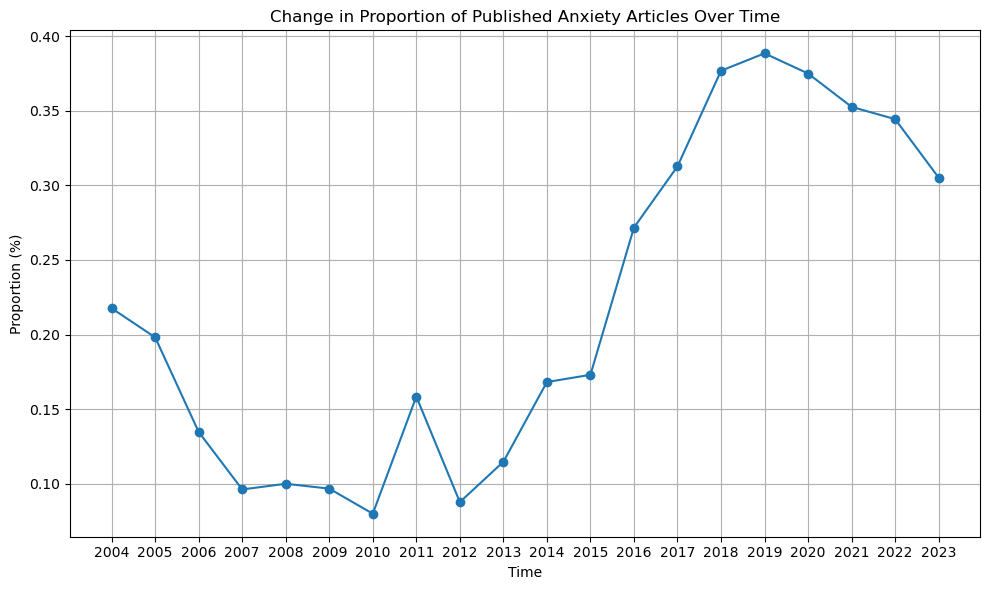

In [77]:
import matplotlib.pyplot as plt
import numpy as np


df_probability_anxiety = pd.read_csv('probability_anxiety.csv')
df_probability_anxiety = df_probability_anxiety[df_probability_anxiety['Year'] != 2024]


percentages = df_probability_anxiety['Probability'] * 100

years = df_probability_anxiety['Year'].astype(str)
months = np.linspace(0, len(years)-1, len(years)) 


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, percentages, marker='o', linestyle='-')
plt.title('Change in Proportion of Published Anxiety Articles Over Time')
plt.xlabel('Time')
plt.ylabel('Proportion (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### hooray! We can actually see an significant increase, reached a peak during 2020, when  the pandemic hits the hardest

#### `also notice that 2024, only 2 months passed, so we get rid of it`

## For Depression

In [71]:

# Load the combined articles dataset
df = pd.read_csv('combined_articles_guardian.csv')

# Initialize a dictionary to store the number of depression articles by year
depression_articles_by_year = {}

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    year = str(row['Year'])  
    body_text = row['Body Text']
    
    # Check if body_text is a string and contains 'depression'
    if isinstance(body_text, str) and 'depression' in body_text.lower():
        # Increment the count of depression articles for the corresponding year
        if year in depression_articles_by_year:
            depression_articles_by_year[year] += 1
        else:
            depression_articles_by_year[year] = 1

# Print the number of depression articles per year
print("Number of Depression Articles per Year:")
for year, count in depression_articles_by_year.items():
    print(f"Year: {year}, Total Depression Articles: {count}")

# Convert the dictionary to a DataFrame
df_depression_articles = pd.DataFrame(list(depression_articles_by_year.items()), columns=['Year', 'Total Depression Articles'])

# Save the DataFrame to a CSV file
df_depression_articles.to_csv('depression_articles_by_year.csv', index=False)

Number of Depression Articles per Year:
Year: 2024, Total Depression Articles: 21
Year: 2023, Total Depression Articles: 216
Year: 2022, Total Depression Articles: 211
Year: 2021, Total Depression Articles: 202
Year: 2020, Total Depression Articles: 216
Year: 2019, Total Depression Articles: 284
Year: 2018, Total Depression Articles: 282
Year: 2017, Total Depression Articles: 244
Year: 2016, Total Depression Articles: 265
Year: 2015, Total Depression Articles: 228
Year: 2014, Total Depression Articles: 241
Year: 2013, Total Depression Articles: 162
Year: 2012, Total Depression Articles: 150
Year: 2011, Total Depression Articles: 210
Year: 2010, Total Depression Articles: 111
Year: 2009, Total Depression Articles: 160
Year: 2008, Total Depression Articles: 208
Year: 2007, Total Depression Articles: 173
Year: 2006, Total Depression Articles: 194
Year: 2005, Total Depression Articles: 217
Year: 2004, Total Depression Articles: 280


In [72]:


df_depression = pd.read_csv('depression_articles_by_year.csv')
df_total = pd.read_csv('total_articles_by_year.csv')

df_dp = pd.merge(df_total, df_depression, on='Year', how='left')
df_dp['Total Depression Articles'] = df_dp['Total Depression Articles'].fillna(0)

# Calculate the probability of publishing depression articles each year
df_dp['Probability'] = df_dp['Total Depression Articles'] / df_dp['Total Articles']

# Save the results to a CSV file
df_dp.to_csv('probability_depression_by_year.csv', index=False)

#### Proportion of depression articles

##### a plot to visualize 

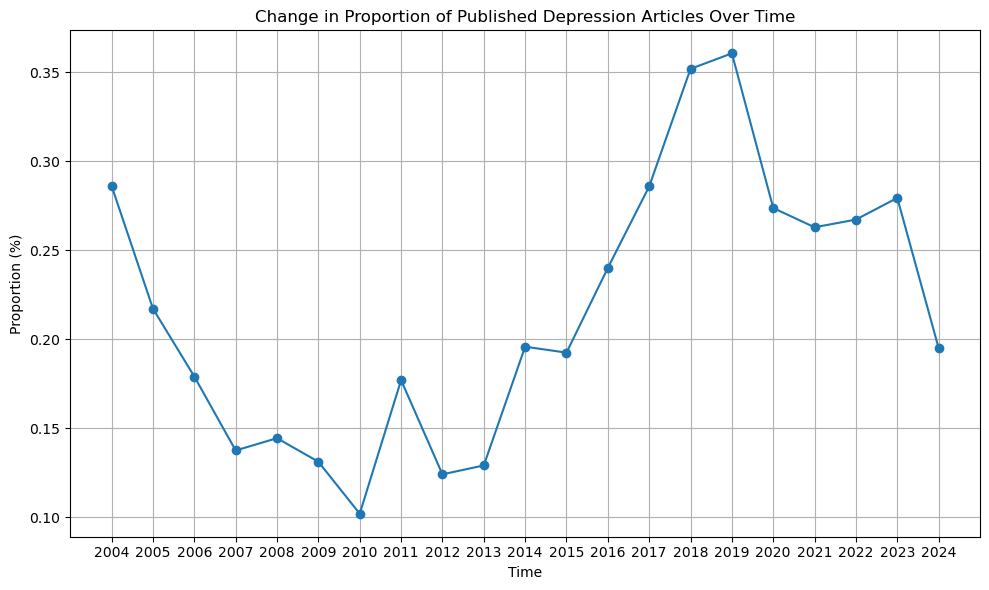

In [73]:
import matplotlib.pyplot as plt
import numpy as np


df_probability_anxiety = pd.read_csv('probability_depression_by_year.csv')


percentages = df_dp['Probability'] * 100


years = df_dp['Year'].astype(str)
months = np.linspace(0, len(years)-1, len(years)) 


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, percentages, marker='o', linestyle='-')
plt.title('Change in Proportion of Published Depression Articles Over Time')
plt.xlabel('Time')
plt.ylabel('Proportion (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### as for depression, it's not that salient, we need to carry out further investiagtion to see if "depression" may also refer to other things...

### Line Show frequency of articles over months (July 1, 2019-January 31, 2024) 


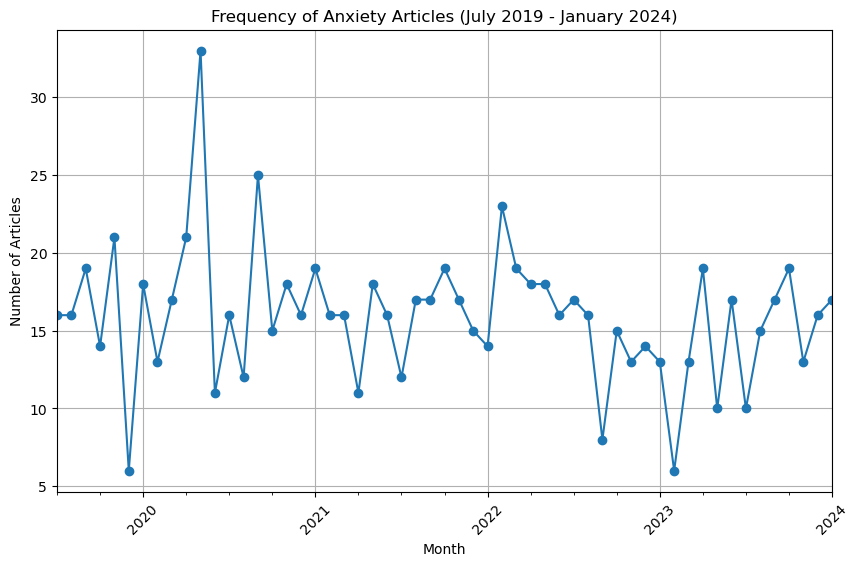

In [87]:
import pandas as pd
import matplotlib.pyplot as plt


combined_df = pd.read_csv('combined_articles_guardian.csv')
combined_df['Date'] = pd.to_datetime(combined_df['Year'].astype(str) + '-' + combined_df['Month'].astype(str), format='%Y-%m')
filtered_df = combined_df[(combined_df['Date'] >= '2019-07-01') & (combined_df['Date'] <= '2024-01-31')]

# Group by month and count the number of anxiety articles
monthly_counts = filtered_df[filtered_df['Anxiety or Depression'] == 0].groupby('Date').size()

monthly_counts.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Frequency of Anxiety Articles (July 2019 - January 2024)')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Let's check the number of mental illness related articles during the beginning of the pandemic(when regulation was the strictest)

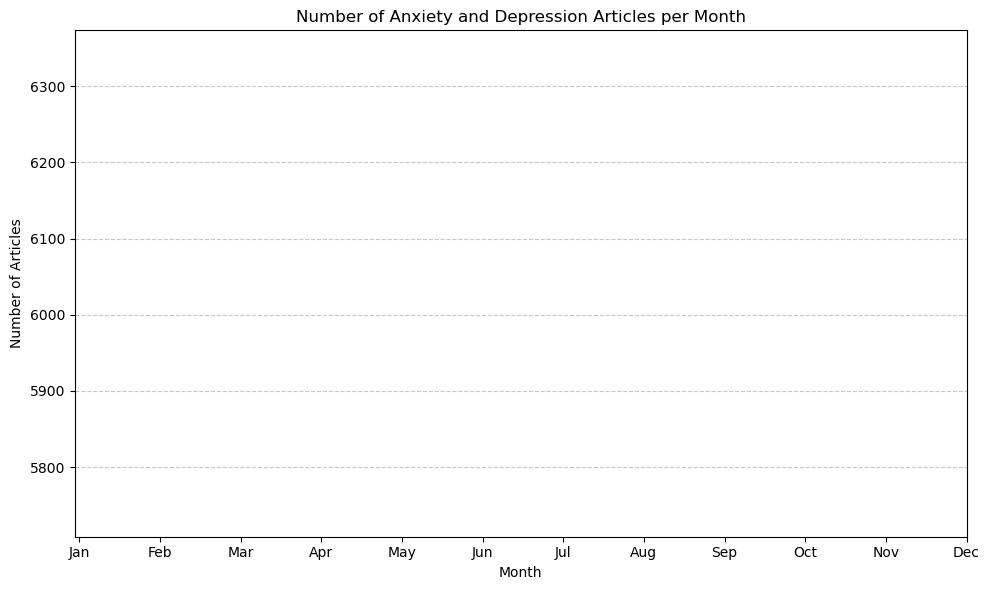

In [91]:
df = pd.read_csv('combined_articles_guardian.csv')

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter the dataframe for articles containing both "anxiety" and "depression"
filtered_df = df[(df['Anxiety or Depression'] == 1) | (df['Anxiety or Depression'] == 0)]  # Selecting both anxiety and depression articles

# Group by month and count the total number of articles
monthly_counts = filtered_df.groupby(filtered_df['Date'].dt.month).size()

# Plotting
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='line', color='skyblue')
plt.title('Number of Anxiety and Depression Articles per Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

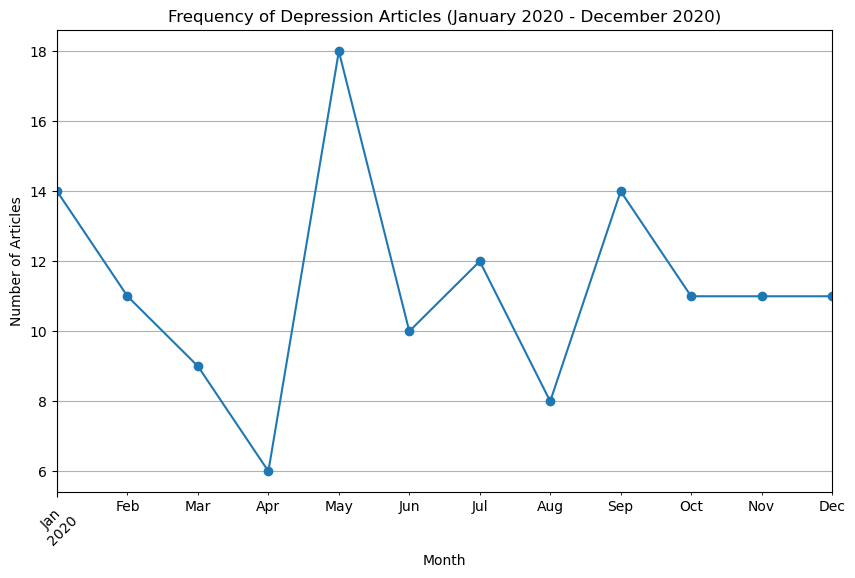

In [88]:
combined_df = pd.read_csv('combined_articles_guardian.csv')

combined_df['Date'] = pd.to_datetime(combined_df['Year'].astype(str) + '-' + combined_df['Month'].astype(str), format='%Y-%m')
filtered_df = combined_df[(combined_df['Date'] >= '2020-01-01') & (combined_df['Date'] <= '2020-12-31')]


monthly_counts = filtered_df[filtered_df['Anxiety or Depression'] == 1].groupby('Date').size()
monthly_counts.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Frequency of Depression Articles (January 2020 - December 2020)')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### we can see a significant increase in APR and May. 
##### according to https://www.cdc.gov/museum/timeline/covid19.html
* April 3, 2020
At a White House press briefing, CDC announces new mask wearing guidelines and recommends that all people wear a mask when outside of the home.

# New York Times 

## Proportion 